# [LAB-08] 1. 워드클라우드 (영문)

- 텍스트 마이닝 분야에서 사용되는 시각화 방법
- 단어의 (상대적)등장 빈도를 표현함

## 실습용 파일 다운로드

아래의 URL에서 다운받고 `작업폴더/wordcloud` 경로에서 압축 해제 ㄱㄱ
>https://data.hossam.kr/data/lab08/wordcloud.zip 

## #01. 준비작업

### 1. 패키지 참조:
`wordcloud` 패키지 설치 후 작업 하셈

In [1]:
import numpy as np

# 이미지 출력을 위한 jupyter 전용 기능
from IPython.display import Image

# 워드클라우드 클래스
from wordcloud import WordCloud

# 금지어 설정 모듈
from wordcloud import STOPWORDS   

# 이미지 처리 모듈 (파이썬 기본 내장)
from PIL import Image as Img

### 2. 데이터 가져오기:

텍스트 데이터가 필요하므로 `txt` 파일을 읽어오기

In [2]:
with open('wordcloud/이상한나라의앨리스.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    # 출력 내용 많으니까 아래 프린트 결과 확인 하고 주석으로 막아두기
    #print(text)

## #02. 기본 사용 방법

In [3]:
# 워드 클라우드 클래스 객체 생성 :
    # 생성될 가로,세로 크기 지정(px단위)
wc = WordCloud(width = 1200, height = 800)

# 읽어들인 텍스느 내용을 generate 메서드에 전달:
wc.generate(text)

# wc.words_: 산정된 각 단어별 빈도에 대한 딕셔너리:
wc.words_

{'said': 1.0,
 'Alice': 0.7114285714285714,
 'said Alice': 0.3314285714285714,
 'little': 0.32,
 'one': 0.3,
 'know': 0.2571428571428571,
 'Project Gutenberg': 0.24857142857142858,
 'thing': 0.23714285714285716,
 'Queen': 0.2342857142857143,
 'went': 0.23142857142857143,
 'time': 0.2257142857142857,
 'see': 0.19714285714285715,
 'head': 0.18285714285714286,
 'well': 0.18285714285714286,
 'King': 0.18285714285714286,
 'now': 0.17714285714285713,
 'way': 0.17142857142857143,
 'Mock Turtle': 0.16857142857142857,
 'began': 0.16285714285714287,
 'Hatter': 0.16285714285714287,
 'Gutenberg tm': 0.16285714285714287,
 'Gryphon': 0.15714285714285714,
 'say': 0.15428571428571428,
 'much': 0.14857142857142858,
 'quite': 0.14857142857142858,
 'must': 0.14857142857142858,
 'first': 0.1457142857142857,
 'come': 0.1457142857142857,
 'go': 0.1457142857142857,
 'never': 0.14,
 'thought': 0.14,
 'think': 0.13714285714285715,
 'voice': 0.13428571428571429,
 'looked': 0.13428571428571429,
 'work': 0.131428

In [4]:
# 그래픽 표시 데이터를 단어 빈도 수에 대한 딕셔너리로 지정 후 파일 저장:
wc.to_file('simple.png')

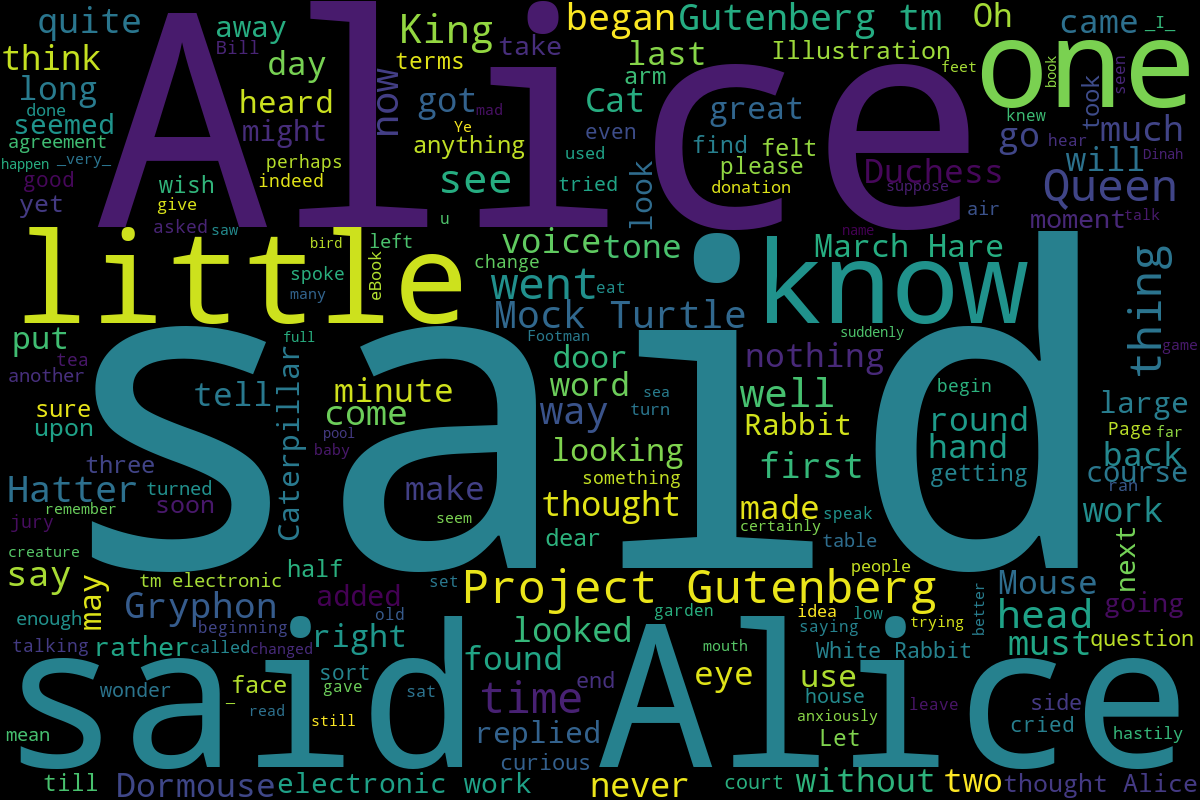

In [5]:
# 이미지를 출력하기 위한 jupyter 전용 코드:
Image('simple.png')

## #03. WordCloud 객체 옵션들

### 1. 금지어 설정:

In [6]:
# 금지어 설정 -> 필요한 만큼 add() 함수를 호출해서 추가:
ignore = set(STOPWORDS)
ignore.add('said')
ignore.add('Alice')

### 2. 마스크 이미지 설정:
- 1 pixel 당 대응되는 R,G,B 각각이 0~255 사이의 값으로 표현됨
  - ex) `#ff00ec`: R=ff(=255), G=00(=0), B=ec(=27)
  - -> 1 pixel당 해당 색을 나타내는 RGB 값이 하나의 리스트가 되는데: [255, 0, 27]
- 이 픽셀이 가로 m개, 세로 n개로 이루어진게 그림이고
- 그럼 하나의 이미지는 2차원 리스트 배열이 되는거임
- 영상은 fps>=12를 만족하는 3차원 리스트 배열이라고 보면 됨
  - (fps: frame per second, 플립북 떠올려보셈)
  - 2차원 이상 부터는 수가 겁나 커지니까 이미지나 동영상 연산을 필요로 할 때 숫자들을 0~1 사이의 값으로 변환하는데
  - cpu는 실수 연산에 극악, gpu가 그래서 필요한거임

In [7]:
img = Img.open('wordcloud/앨리스배경.png') 
iarr = np.array(img)
iarr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(900, 900), dtype=uint8)

### 3. 워드 클라우드 확인:

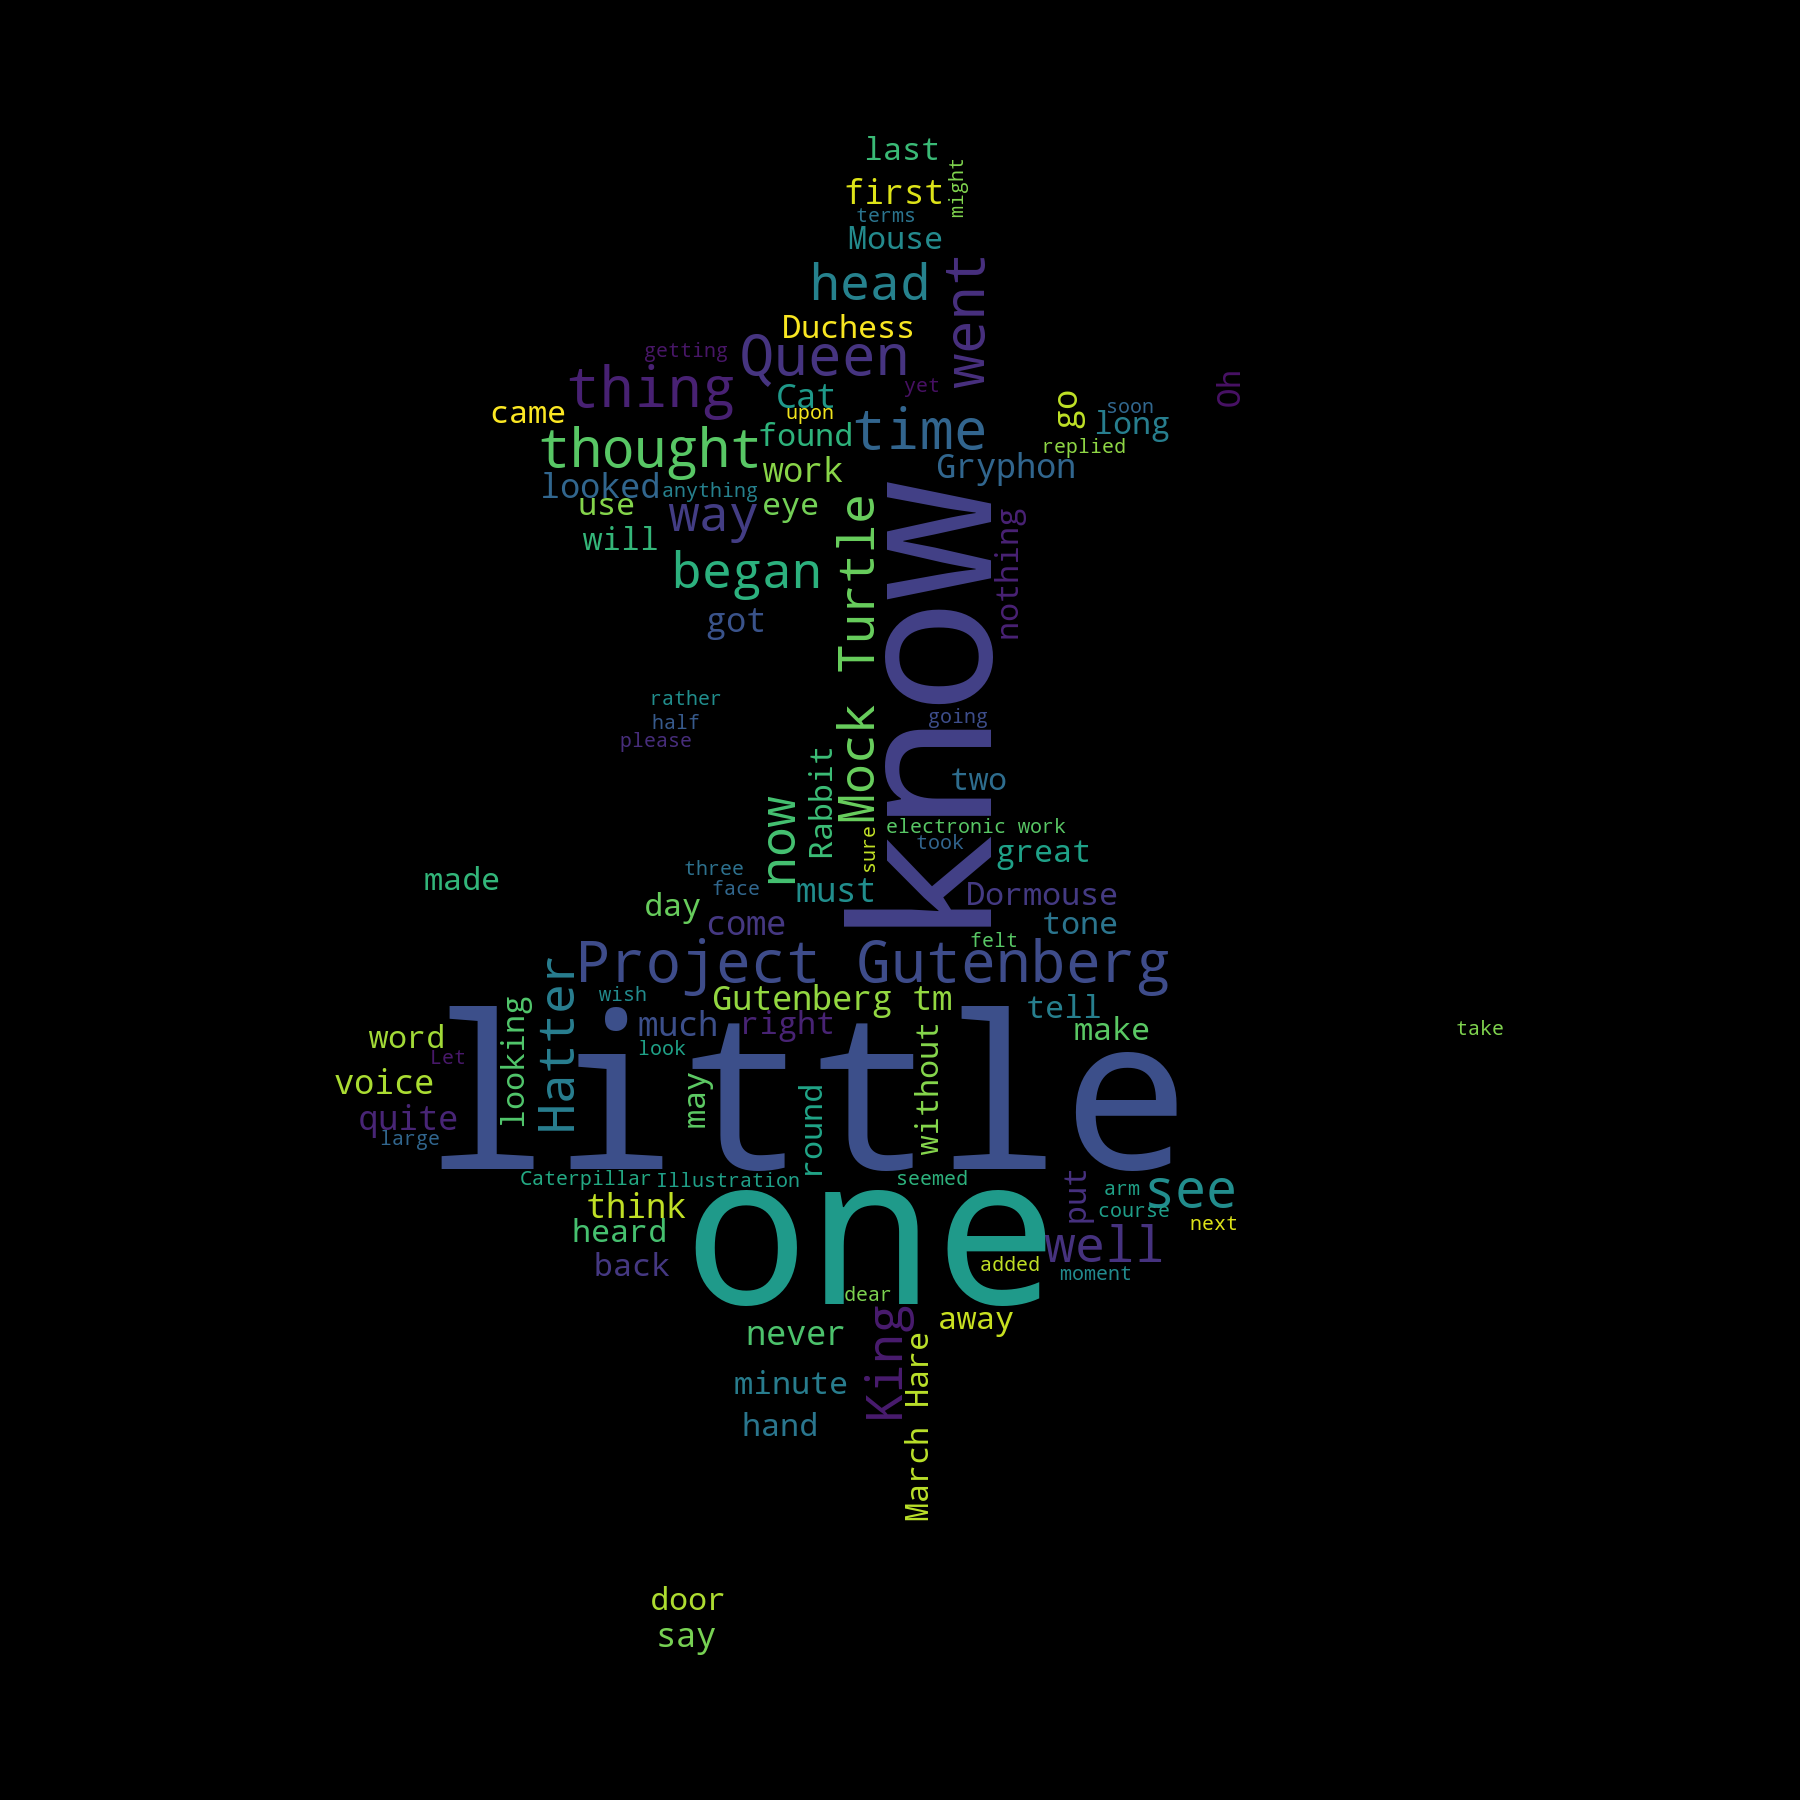

In [8]:
wc = WordCloud(width = 600, height = 1200,
               max_font_size = 150,# 최대 글자 크기
               scale = 2.0,        # 이미지 스케일 (dpi=200과 동일)
               max_words = 100,    # 워드클라우드에 담을 최대 단어수
               stopwords = ignore, # 금지어 목록
               mask = iarr)        # 마스크로 사용할 이미지 배열
wc.generate(text)
wc.to_file('options.png')
Image(filename = 'options.png')

## #04. 칼라 팔레트 사용

`colormap` 파라미터를 사용하면 pyplot애서 제공하는 칼라 팔레트를 적용할 수 있다 (seaborn 내장 칼라맵):
> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Grays, Greens, Greens_r, Greys, Greys_r, OrRd,OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r,  YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_grey, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gist_yerg, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, grey, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, turbo, turbo_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

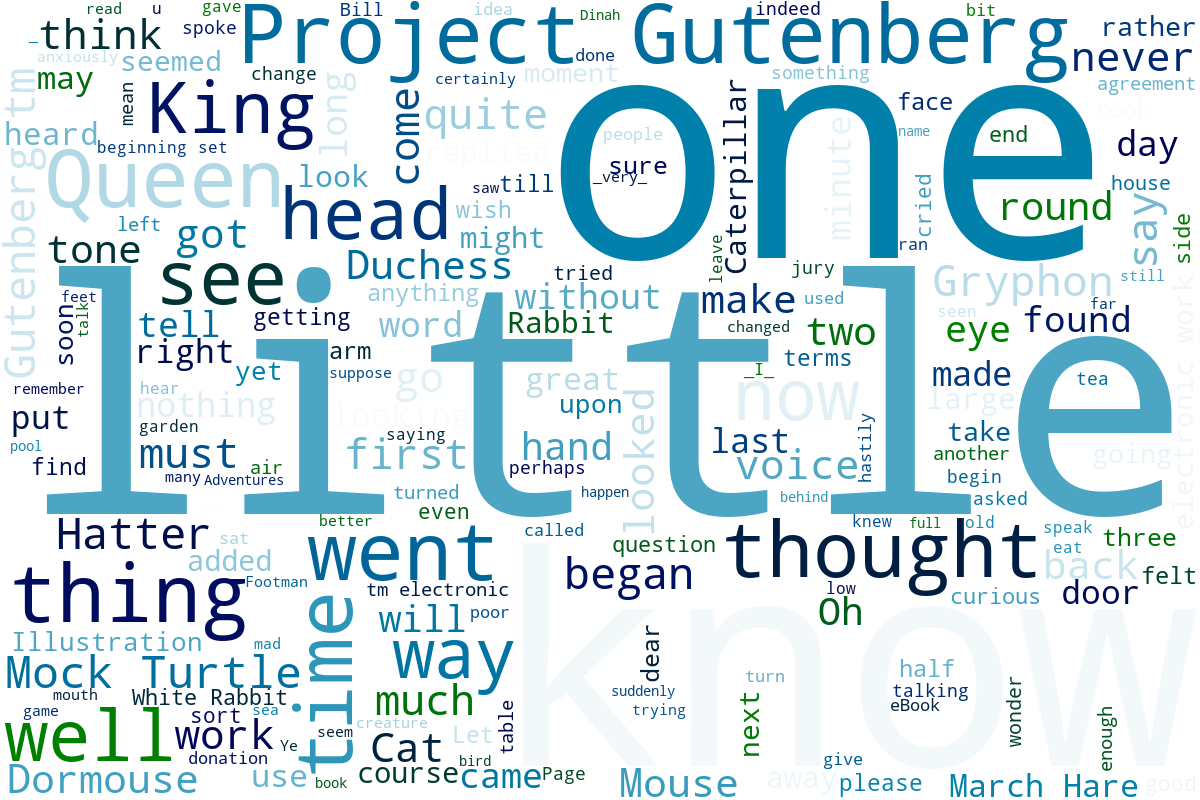

In [9]:
# background_color 파라미터: 배경색 설정
wc = WordCloud(width = 1200, height = 800, stopwords = ignore, 
               background_color = '#ffffff', colormap = 'ocean')        
wc.generate(text)
wc.to_file('colormap.png')
Image(filename = 'colormap.png')